# ◼영화 관람객 수 예측

## ◾개요

- 2011~2019년 영화 데이터를 이용해 영화 관람객 수 예측 모델 구현
- 해당 모델을 2020년 영화에 적용하여 코로나19의 영향이 없었을 경우 관람객 수 예측
- 해당 결과를 바탕으로 2020년의 영화들에 끼친 코로나19의 영향을 확인해보려한다.

## ◾데이터 소개

#### 영화 데이터

- KOBIS 공식 통계 : https://www.kobis.or.kr/kobis/business/stat/offc/searchOfficHitTotList.do?searchMode=year
- 한국영화연감(1971~2010) 통계를 기준으로 정리한 것이며, 2011년부터는 통합전산망을 기준으로 일정한 주기(매월, 매년)로 마감처리하여 산출되는 통계정보
  - 통합전산망을 사용한 2011년~2020년 데이터를 사용한다.
- 컬럼 정보
  - 순번 : 인덱스, 수치형
  - 영화명 : 영화명, 범주형
  - 감독 : 감독명, 범주형(다수일 경우 ', '로 구분)
  - 제작사 : 제작사명, 범주형(다수일 경우 ', '로 구분)
  - 수입사 : 수입사명, 범주형(다수일 경우 ', '로 구분)
  - 배급사 : 배급사명, 범주형(다수일 경우 ', '로 구분)
  - 개봉일 : 개봉일, 날짜형('YYYY-MM-DD')
  - 영화유형 : 영화 유형, 범주형
  - 영화형태 : 영화 형태, 범주형('장편', '단편', '옴니버스')
  - 국적 : 영화 제작 국가, 범주형
  - 전국스크린수 : 개봉 첫 주 최대 스크린 수, 수치형
  - 전국매출액 : 전국 매출액, 수치형
  - 전국관객수 : 전국 관객수, 수치형
  - 서울매출액 : 서울 매출액, 수치형
  - 서울관객수 : 서울 관객수, 수치형
  - 장르 : 대표 장르, 범주형
    - 21개의 유형(<a href = 'https://www.kobis.or.kr/kobis/business/stat/online/onlineGenreStat.do?CSRFToken=yOhFhXI1uvJrdJ_SERa8YxZhVjS9tKCERgIId5CsBXA&loadEnd=0&searchType=search&sSearchYearFrom=2021&sSearchMonthFrom=02&sSearchYearTo=2021&sSearchMonthTo=08' target='_blink'>KOBIS 장르별 통계 기준</a>)
    - SF, 가족, 공연, 공포(호러), 기타, 다큐멘터리, 드라마, 멜로/로맨스, 뮤지컬, 미스터리, 범죄, 사극, 서부극(웨스턴), 성인물(에로) ,스릴러, 애니메이션, 액션, 어드벤처, 전쟁, 코미디, 판타지
  - 등급 : 영화 시청 등급, 범주형
  - 영화구분 : 영화 구분, 범주형('일반 영화', '독립/예술영화')


In [245]:
import pandas as pd
import numpy as np

movie = pd.read_excel('../data/전체영화데이터.xls', index_col=0)
movie.head()

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,장르,등급,영화구분
순번,,,,,,,,,,,,,,,,,
1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,1587,135748398910,17613682,3.312123e+10,4163666,사극,15세이상관람가,일반영화
2,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,1978,139647979516,16264944,3.185866e+10,3638287,코미디,15세이상관람가,일반영화
3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",NaN,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,개봉영화,장편,한국,1912,115698654137,14410754,2.753083e+10,3346172,판타지,12세이상관람가,일반영화
4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2014-12-17,개봉영화,장편,한국,966,110828014630,14245998,2.584252e+10,3233946,드라마,12세이상관람가,일반영화
5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,2835,122182694160,13934592,3.357714e+10,3597963,액션,12세이상관람가,일반영화


## ◾데이터 분석

In [363]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import set_matplotlib_korean
import warnings
warnings.filterwarnings(action='ignore')

### 1. 영화 데이터

#### 영화 데이터 결측치

- 2011 ~ 2020년 총 13308개의 데이터
- 결측치가 있는 컬럼을 확인하여 결측치를 확인해본다.

In [247]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13308 entries, 1 to 13308
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     13308 non-null  object        
 1   감독      12619 non-null  object        
 2   제작사     3941 non-null   object        
 3   수입사     9095 non-null   object        
 4   배급사     13292 non-null  object        
 5   개봉일     13308 non-null  datetime64[ns]
 6   영화유형    13308 non-null  object        
 7   영화형태    13307 non-null  object        
 8   국적      13308 non-null  object        
 9   전국스크린수  13308 non-null  int64         
 10  전국매출액   13308 non-null  int64         
 11  전국관객수   13308 non-null  int64         
 12  서울매출액   13302 non-null  float64       
 13  서울관객수   13308 non-null  int64         
 14  장르      13238 non-null  object        
 15  등급      13308 non-null  object        
 16  영화구분    13308 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object

- 제작사, 수입사, 배급사 결측치
  - 제작사, 수입사의 경우 결측치가 많으므로 배급사를 대표값으로 사용한다.
  - 제작사, 수입사 컬럼은 삭제한다.
- 감독, 장르, 배급사, 영화 형태의 결측치는 '기타'로 대체한다.
- 서울매출액, 서울관객수 컬럼은 삭제한다.

In [248]:
movie.isnull().sum()

영화명          0
감독         689
제작사       9367
수입사       4213
배급사         16
개봉일          0
영화유형         0
영화형태         1
국적           0
전국스크린수       0
전국매출액        0
전국관객수        0
서울매출액        6
서울관객수        0
장르          70
등급           0
영화구분         0
dtype: int64

In [249]:
# 결측치 처리
movie = movie.drop(['제작사', '수입사'], axis=1)
movie = movie.drop(['서울매출액', '서울관객수'], axis=1)
movie['감독'].fillna('기타', inplace=True)
movie['장르'].fillna('기타', inplace=True)
movie['배급사'].fillna('기타', inplace=True)
movie['영화형태'].fillna('기타', inplace=True)

In [250]:
movie.isnull().sum()

영화명       0
감독        0
배급사       0
개봉일       0
영화유형      0
영화형태      0
국적        0
전국스크린수    0
전국매출액     0
전국관객수     0
장르        0
등급        0
영화구분      0
dtype: int64

In [251]:
# 데이터 임시 저장
# movie.to_excel('../data/전체영화데이터_1_fillna.xls', encoding='utf-8')
# xlwt의 유지보수가 끝나 사용이 종료된다고 한다. 으악

# import openpyxl
# openpyxl 사용 코드 예시를 첨부한다.
# writer = pd.ExcelWriter("../data/test.xls", engine='openpyxl', date_format='YYYY-MM-DD')
# movie.to_excel(writer)
# writer.close()

#### 영화 데이터 범주형 확인

- 데이터 유형
  - 날짜형(1개) : 개봉일('YYYY-MM-DD')
  - 수치형(3개) : 전국스크린수, 전국매출액, 전국관객수
  - 범주형(9개) : 영화명, 감독, 배급사, 영화유형, 영화형태, 국적, 장르, 등급, 영화구분
- 범주형 데이터 중복 확인한 결과 영화명을 제외하고 중복값이 많은 것을 볼 수 있다.
- 각 범주형을 살펴보며 데이터 정리를 진행한다.

In [252]:
category_cols = ['영화명','감독','배급사','영화유형','영화형태','국적','장르','등급','영화구분',]

# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(movie[col].unique())))

컬럼 [영화명] UNIQUE : 13116
컬럼 [감독] UNIQUE : 6131
컬럼 [배급사] UNIQUE : 905
컬럼 [영화유형] UNIQUE : 1
컬럼 [영화형태] UNIQUE : 4
컬럼 [국적] UNIQUE : 68
컬럼 [장르] UNIQUE : 21
컬럼 [등급] UNIQUE : 10
컬럼 [영화구분] UNIQUE : 2


##### 1. 감독

- 감독 데이터
  - 다수의 감독이 있는 경우 콤마(,)로 구분되어 있다.
  - 다수의 감독을 분리하여 1명의 대표감독으로 변경해준다.
    - ','를 기준으로 분리 오름차순 정렬 후 첫 번째 감독을 사용
    - `'안소니 루소,조 루소'`-`'조 루소, 안소니 루소'`와 같은 형태가 존재하기에 정렬을 진행한다.

In [253]:
movie['감독'].unique()

array(['김한민', '이병헌', '김용화', ..., '오카다 히로', '허재형', '레 탄 선'], dtype=object)

In [254]:
# 다수의 감독 데이터 변경
for idx, row in movie.iterrows():
    if ',' in row['감독']:
        directors = row['감독'].split(',')
        # 양 끝 공백 제거 후 정렬
        directors.sort(key=lambda x : x.strip())
        movie['감독'][idx] = directors[0].strip()

- 대표 감독 선정으로 5987 개로 정리되었다.

In [255]:
print(len(movie['감독'].unique()))
movie['감독'].unique()

5987


array(['김한민', '이병헌', '김용화', ..., '오카다 히로', '허재형', '레 탄 선'], dtype=object)

##### 2. 배급사

- 배급사 데이터
  - 다수의 배급사가 있는 경우 콤마(,)로 구분되어 있다.
  - 다수의 배급사를 분리하여 1개의 대표배급사로 변경해준다.
    - 가장 처음 나오는 배급사 이름이 가장 중요하다고 판단하여 해당 배급사를 대표배급사로 결정한다.

In [256]:
movie['배급사'].unique()

array(['(주)씨제이이엔엠', '롯데쇼핑㈜롯데엔터테인먼트', '월트디즈니컴퍼니코리아 유한책임회사', '(주)쇼박스',
       '(주)넥스트엔터테인먼트월드(NEW)', '롯데컬처웍스(주)롯데엔터테인먼트',
       '월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)', '소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)',
       '워너브러더스 코리아(주)', '월트디즈니컴퍼니코리아 유한책임회사,이십세기폭스코리아(주)',
       '월트디즈니컴퍼니코리아(주)', '(주)씨제이이엔엠,(주)덱스터스튜디오',
       '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점',
       '월트디즈니컴퍼니코리아 유한책임회사,한국소니픽쳐스릴리징브에나비스타영화㈜', '이십세기폭스코리아(주)',
       '메가박스중앙(주)플러스엠,(주)키위미디어그룹', '유니버설픽쳐스인터내셔널 코리아(유)',
       '한국소니픽쳐스릴리징브에나비스타영화㈜', 'CGV아트하우스,(주)대명문화공장',
       '롯데쇼핑㈜롯데엔터테인먼트,(주)싸이더스', '메가박스중앙(주)플러스엠', '판씨네마(주)', '(주)와우픽쳐스',
       '(주)에이스메이커무비웍스,(주)키위미디어그룹', '롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스',
       '(주)스튜디오디에이치엘,주식회사 해리슨앤컴퍼니,워너브러더스 코리아(주)', '아이러브시네마',
       '(주)인벤트스톤,영화사청어람(주)', '(주)에이스메이커무비웍스', '필라멘트픽쳐스',
       '오퍼스픽쳐스(유),CGV아트하우스', '에스케이플래닛(주),(주)씨제이이엔엠', '씨네그루(주)다우기술',
       '(주)메리크리스마스,TCO(주)더콘텐츠온', 'CJ ENM', 'CGV아트하우스,영화사 풀',
       '(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온', '씨너스엔터테인먼트(주),타임스토리그룹(주)',
       '(주)영화사 그램,이십세기폭스코리아(주)', 'CGV아트하우스', '주

In [257]:
# 다수의 배급사 데이터 변경
for idx, row in movie.iterrows():
    if ',' in row['배급사']:
        distributor = row['배급사'].split(',')
        # 양 끝 공백 제거 후 변경
        movie['배급사'][idx] = distributor[0].strip()

- 대표 배급사 선정으로 300개가 줄어 606개가 되었다.
- 확인한 결과 디즈니, 소니픽쳐스, CGV, 롯데, 메가박스 5개의 경우 반복되는 경우가 있다.
  - 이러한 경우는 동일한 것으로 보고 ['디즈니', '소니픽쳐스', 'CGV', '롯데', '메가박스']로 변경해준다.

In [258]:
print(len(movie['배급사'].unique()))

606


In [259]:
movie['배급사'].unique()

array(['(주)씨제이이엔엠', '롯데쇼핑㈜롯데엔터테인먼트', '월트디즈니컴퍼니코리아 유한책임회사', '(주)쇼박스',
       '(주)넥스트엔터테인먼트월드(NEW)', '롯데컬처웍스(주)롯데엔터테인먼트',
       '소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)', '워너브러더스 코리아(주)', '월트디즈니컴퍼니코리아(주)',
       '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점', '이십세기폭스코리아(주)', '메가박스중앙(주)플러스엠',
       '유니버설픽쳐스인터내셔널 코리아(유)', '한국소니픽쳐스릴리징브에나비스타영화㈜', 'CGV아트하우스',
       '판씨네마(주)', '(주)와우픽쳐스', '(주)에이스메이커무비웍스', '(주)스튜디오디에이치엘', '아이러브시네마',
       '(주)인벤트스톤', '필라멘트픽쳐스', '오퍼스픽쳐스(유)', '에스케이플래닛(주)', '씨네그루(주)다우기술',
       '(주)메리크리스마스', 'CJ ENM', '(주)제이앤씨미디어그룹', '씨너스엔터테인먼트(주)',
       '(주)영화사 그램', '주식회사 해리슨앤컴퍼니', '워터홀컴퍼니(주)', '(주)키다리이엔티', '(주)디스테이션',
       '(주)시너지하우스 (시너지)', '(주)에스비에스콘텐츠허브', '(주)누리픽쳐스', '글뫼 주식회사',
       '(주)시네마서비스', '(주)스마일이엔티', '(주)올스타엔터테인먼트', '(주)화앤담이엔티', '(주)리틀빅픽쳐스',
       '(주)피터팬픽쳐스', '(주)미디어데이', '(주)싸이더스', '유나이티드픽처스(주)', '주식회사 우리네트웍스',
       '(주)나이너스엔터테인먼트', '(주)이수C&E', '(주)엣나인필름', 'TCO(주)더콘텐츠온', '영화사올(주)',
       '(주)콘텐츠 난다긴다', '(주)마인스 엔터테인먼트', '오드', '주식회사 마운틴픽쳐스', '(주)팝엔터테인먼트',
       '주식회사 더쿱', '씨제이 씨지브이(CJ C

In [260]:
# 중복 배급사 변경
distributor = ['디즈니', '소니픽쳐스', 'CGV', '롯데', '메가박스']
for idx, row in movie.iterrows():
    for d in distributor:
        if d in row['배급사']:
            movie['배급사'][idx] = d

- 중복 제거 후 최종적으로 597개의 유형이 남았다.

In [261]:
len(movie['배급사'].unique()), movie['배급사'].unique()

(597,
 array(['(주)씨제이이엔엠', '롯데', '디즈니', '(주)쇼박스', '(주)넥스트엔터테인먼트월드(NEW)', '소니픽쳐스',
        '워너브러더스 코리아(주)', '이십세기폭스코리아(주)', '메가박스', '유니버설픽쳐스인터내셔널 코리아(유)',
        'CGV', '판씨네마(주)', '(주)와우픽쳐스', '(주)에이스메이커무비웍스', '(주)스튜디오디에이치엘',
        '아이러브시네마', '(주)인벤트스톤', '필라멘트픽쳐스', '오퍼스픽쳐스(유)', '에스케이플래닛(주)',
        '씨네그루(주)다우기술', '(주)메리크리스마스', 'CJ ENM', '(주)제이앤씨미디어그룹',
        '씨너스엔터테인먼트(주)', '(주)영화사 그램', '주식회사 해리슨앤컴퍼니', '워터홀컴퍼니(주)',
        '(주)키다리이엔티', '(주)디스테이션', '(주)시너지하우스 (시너지)', '(주)에스비에스콘텐츠허브',
        '(주)누리픽쳐스', '글뫼 주식회사', '(주)시네마서비스', '(주)스마일이엔티', '(주)올스타엔터테인먼트',
        '(주)화앤담이엔티', '(주)리틀빅픽쳐스', '(주)피터팬픽쳐스', '(주)미디어데이', '(주)싸이더스',
        '유나이티드픽처스(주)', '주식회사 우리네트웍스', '(주)나이너스엔터테인먼트', '(주)이수C&E',
        '(주)엣나인필름', 'TCO(주)더콘텐츠온', '영화사올(주)', '(주)콘텐츠 난다긴다',
        '(주)마인스 엔터테인먼트', '오드', '주식회사 마운틴픽쳐스', '(주)팝엔터테인먼트', '주식회사 더쿱',
        '(주)프레인글로벌', '(주)삼백상회', '(주)박수엔터테인먼트', '타임스토리그룹(주)', '(주)팝파트너스',
        '(재)CBS', '예지림엔터테인먼트', '(주)영화사 빅', '(주)홈초이스', '㈜코리아스크린', '(주)그노스',
        '(주)이놀미디어'

##### 3. 영화 유형

- 영화유형 데이터
  - 1개의 유형만 가지고 있으므로 해당 컬럼은 삭제한다.

In [262]:
movie['영화유형'].unique()

array(['개봉영화'], dtype=object)

In [263]:
movie.drop('영화유형', axis=1, inplace=True)

In [264]:
movie.columns

Index(['영화명', '감독', '배급사', '개봉일', '영화형태', '국적', '전국스크린수', '전국매출액', '전국관객수',
       '장르', '등급', '영화구분'],
      dtype='object')

##### 4. 영화형태

- 영화형태 데이터
  - 4개의 유형을 가진 데이터로 이상한 값은 없으므로 넘어간다.
  - 장편이 압도적으로 많은 것을 볼 수 있다.

In [265]:
movie['영화형태'].unique()

array(['장편', '옴니버스', '단편', '기타'], dtype=object)

In [266]:
movie['영화형태'].value_counts()

장편      13262
옴니버스       44
단편          1
기타          1
Name: 영화형태, dtype: int64

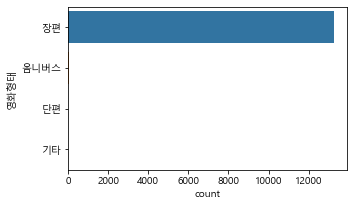

In [267]:
ordered_index = movie['영화형태'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(5, 3))
sns.countplot(data = movie, y = '영화형태', order=ordered_index)
plt.show()

##### 5. 국적

- 국적 데이터
  - 총 68개의 유형이 있다.
  - 국적별 영화수의 top3과 나머지의 차이가 많으므로 나머지 국가를 기타로 변경한다.

In [268]:
len(movie['국적'].unique()), movie['국적'].unique()

(68,
 array(['한국', '미국', '일본', '영국', '프랑스', '벨기에', '아이슬란드', '독일', '스페인', '러시아',
        '아일랜드', '남아프리카공화국', '인도', '대만', '핀란드', '중국', '스웨덴', '이탈리아', '호주',
        '덴마크', '캐나다', '기타', '아르헨티나', '홍콩', '페루', '태국', '우크라이나', '노르웨이',
        '오스트리아', '터키', '멕시코', '뉴질랜드', '체코', '그리스', '폴란드', '칠레', '헝가리',
        '말레이시아', '인도네시아', '브라질', '네덜란드', '이스라엘', '이란', '싱가포르', '루마니아',
        '포르투갈', '스위스', '팔레스타인', '콜롬비아', '에스토니아', '아랍에미리트연합국정부', '베트남',
        '몽고', '불가리아', '부탄', '슬로바키아', '쿠바', '크로아티아', '베네수엘라', '카자흐스탄',
        '우루과이', '몰타', '필리핀', '세르비아', '이라크', '마케도니아', '모로코', '우즈베키스탄'],
       dtype=object))

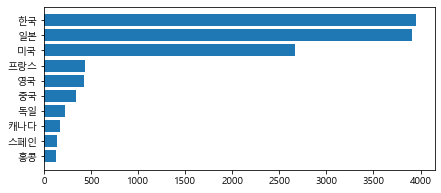

In [269]:
top10 = movie['국적'].value_counts().sort_values(ascending=True)[-10:].copy()
plt.figure(figsize=(7, 3))
plt.barh(top10.index, top10.values)
plt.show()

In [270]:
# 국적 데이터 변경
for idx, row in movie.iterrows():
    if  row['국적'] not in ['한국', '일본', '미국']:
        movie['국적'][idx] = '기타'

- 총 4개의 유형만 남은 것을 볼 수 있다.

In [271]:
movie['국적'].value_counts()

한국    3954
일본    3912
기타    2774
미국    2668
Name: 국적, dtype: int64

##### 6. 장르

- 장르 데이터
  - 결측치를 기타로 변경한 뒤이기 때문에 `KOBIS 장르 분포 통계` 기준과 같은 장르를 가진다.
  - count를 확인해본 결과 멜로/로맨스가 가장 높은 수치를 기록하였다.

In [272]:
len(movie['장르'].unique()), movie['장르'].unique()

(21,
 array(['사극', '코미디', '판타지', '드라마', '액션', '애니메이션', '어드벤처', 'SF', '범죄', '전쟁',
        '미스터리', '멜로/로맨스', '스릴러', '다큐멘터리', '공포(호러)', '뮤지컬', '가족', '공연',
        '기타', '서부극(웨스턴)', '성인물(에로)'], dtype=object))

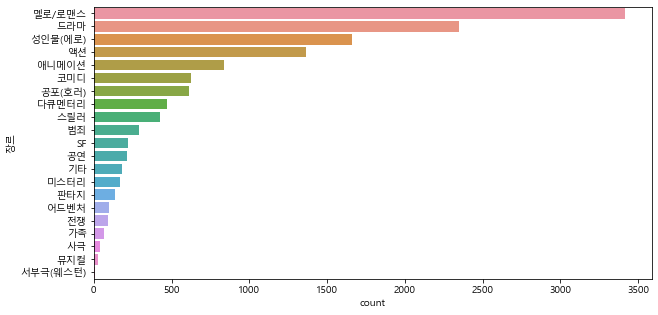

In [273]:
ordered_index = movie['장르'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(10, 5))
sns.countplot(data = movie, y = '장르', order=ordered_index)
plt.show()

##### 7. 등급

- 등급 데이터
  - 10개의 유형이 있고 복수의 데이터가 있는 경우를 확인하였다. 
  - 다수의 등급을 분리하여 1개의 대표등급으로 변경해준다.
    - 다수의 등급이 있는 경우 시청 연령이 작은 쪽을 선택해준다.

In [274]:
len(movie['등급'].unique()), movie['등급'].unique()

(10,
 array(['15세이상관람가', '12세이상관람가', '전체관람가', '청소년관람불가', '청소년관람불가,15세이상관람가',
        '15세관람가', '12세이상관람가,15세이상관람가', '12세이상관람가,전체관람가', '15세이상관람가,전체관람가',
        '15세관람가,12세이상관람가'], dtype=object))

In [275]:
# 다수의 감독 데이터 변경
for idx, row in movie.iterrows():
    if ',' in row['등급']:
        ratings = row['등급'].split(',')
        # 양 끝 공백 제거 후 정렬
        if '전체' in ratings:
            movie['등급'][idx] = '전체관람가'
        elif '12' in ratings:
            movie['등급'][idx] = '12세관람가'
        elif '15' in ratings:
            movie['등급'][idx] = '15세관람가'
        else:
            movie['등급'][idx] = '청소년관람불가'
    else:
        movie['등급'][idx] = movie['등급'][idx].replace('이상', '')

- 총 4개의 유형으로 정리하였다.
  - 15세관람가, 12세관람가, 전체관람가, 청소년관람불가

In [276]:
len(movie['등급'].unique()), movie['등급'].unique()

(4, array(['15세관람가', '12세관람가', '전체관람가', '청소년관람불가'], dtype=object))

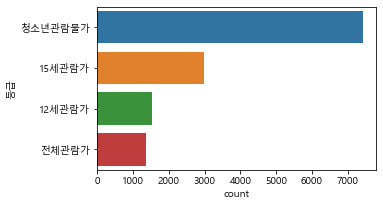

In [277]:
ordered_index = movie['등급'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(5, 3))
sns.countplot(data = movie, y = '등급', order=ordered_index)
plt.show()

##### 8. 영화구분

- 영화구분 데이터
  - 2개의 유형이 있고 일반영화가 2배 정도 더 많은 수치를 기록했다.

In [278]:
len(movie['영화구분'].unique()), movie['영화구분'].unique()

(2, array(['일반영화', '독립/예술영화'], dtype=object))

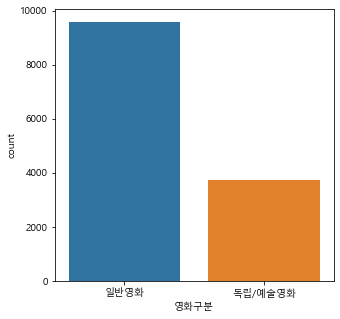

In [279]:
plt.figure(figsize=(5, 5))
sns.countplot(data = movie, x = '영화구분')
plt.show()

##### 데이터 임시 저장

In [280]:
# 데이터 임시 저장
# movie.to_excel('../data/전체영화데이터_2_category.xls', encoding='utf-8')

#### 영화 데이터 수치형 확인

- 데이터 유형
  - 날짜형(1개) : 개봉일('YYYY-MM-DD')
  - 수치형(3개) : 전국스크린수, 전국매출액, 전국관객수
  - 범주형(8개) : 영화명, 감독, 배급사, 영화형태, 국적, 장르, 등급, 영화구분

In [281]:
movie[['전국스크린수', '전국매출액', '전국관객수']].describe().astype('int')

,전국스크린수,전국매출액,전국관객수
count,13308,13308,13308
mean,86,1141088085,143850
std,224,-2147483648,808506
min,0,0,0
25%,1,6000,1
50%,2,300000,61
75%,34,34914520,4845
max,2835,-2147483648,17613682


- 전국스크린수는 34개가 75% 지점이지만 최대값은 2835개인 만큼 불균형 현상이 있는 것을 볼 수 있다.

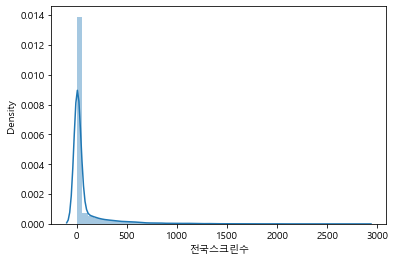

In [282]:
sns.distplot(movie['전국스크린수']);

- 매출액 또한 편향된 데이터를 가진 것을 볼 수 있다.

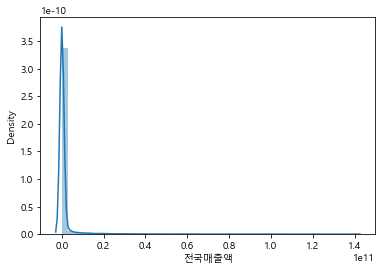

In [283]:
sns.distplot(movie['전국매출액']);

- 관객수 또한 편향된 데이터를 보이며 전체에 비해 소수의 영화만이 흥행에 성공한다는 것을 볼 수 있다.

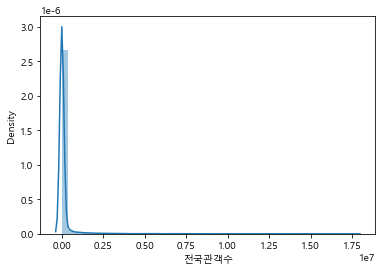

In [284]:
sns.distplot(movie['전국관객수']);

#### 영화 데이터 조절

- 데이터의 분포가 치우져져 있기 때문에 관객 수 기준 약 70% 이상의 값만 사용하기로 합니다.
  - 70%의 값이 2097로 관객수가 2000이상인 데이터만 사용합니다.
  - 2000이상인 데이터는 총 4051개임을 볼 수 있다.

In [285]:
movie['전국관객수'].quantile(q=0.7)

2097.0

In [286]:
movie[(movie['전국관객수'] > 2000)].count()

영화명       4051
감독        4051
배급사       4051
개봉일       4051
영화형태      4051
국적        4051
전국스크린수    4051
전국매출액     4051
전국관객수     4051
장르        4051
등급        4051
영화구분      4051
dtype: int64

In [287]:
movie_70 = movie[(movie['전국관객수'] > 2000)]

- 중복값 확인

In [288]:
len(movie_70['영화명'].unique()), movie_70['영화명'].unique()

(4016,
 array(['명량', '극한직업', '신과함께-죄와 벌', ..., '잠 못 드는 밤', '파리 오페라', '바다의 뚜껑'],
       dtype=object))

In [289]:
len(movie_70['감독'].unique()), movie_70['감독'].unique()

(2682,
 array(['김한민', '이병헌', '김용화', ..., '시린 네샤트', '장-스테판 브롱', '토요시마 케이스케'],
       dtype=object))

In [290]:
len(movie_70['배급사'].unique()), movie_70['배급사'].unique()

(274,
 array(['(주)씨제이이엔엠', '롯데', '디즈니', '(주)쇼박스', '(주)넥스트엔터테인먼트월드(NEW)', '소니픽쳐스',
        '워너브러더스 코리아(주)', '이십세기폭스코리아(주)', '메가박스', '유니버설픽쳐스인터내셔널 코리아(유)',
        'CGV', '판씨네마(주)', '(주)와우픽쳐스', '(주)에이스메이커무비웍스', '(주)스튜디오디에이치엘',
        '아이러브시네마', '(주)인벤트스톤', '필라멘트픽쳐스', '오퍼스픽쳐스(유)', '에스케이플래닛(주)',
        '씨네그루(주)다우기술', '(주)메리크리스마스', 'CJ ENM', '(주)제이앤씨미디어그룹',
        '씨너스엔터테인먼트(주)', '(주)영화사 그램', '주식회사 해리슨앤컴퍼니', '워터홀컴퍼니(주)',
        '(주)키다리이엔티', '(주)디스테이션', '(주)시너지하우스 (시너지)', '(주)에스비에스콘텐츠허브',
        '(주)누리픽쳐스', '글뫼 주식회사', '(주)시네마서비스', '(주)스마일이엔티', '(주)올스타엔터테인먼트',
        '(주)화앤담이엔티', '(주)리틀빅픽쳐스', '(주)피터팬픽쳐스', '(주)미디어데이', '(주)싸이더스',
        '유나이티드픽처스(주)', '주식회사 우리네트웍스', '(주)나이너스엔터테인먼트', '(주)이수C&E',
        '(주)엣나인필름', 'TCO(주)더콘텐츠온', '영화사올(주)', '(주)콘텐츠 난다긴다',
        '(주)마인스 엔터테인먼트', '오드', '주식회사 마운틴픽쳐스', '(주)팝엔터테인먼트', '주식회사 더쿱',
        '(주)프레인글로벌', '(주)삼백상회', '(주)박수엔터테인먼트', '타임스토리그룹(주)', '(주)팝파트너스',
        '(재)CBS', '예지림엔터테인먼트', '(주)영화사 빅', '(주)홈초이스', '㈜코리아스크린', '(주)그노스',
        '(주)이놀미디어'

In [291]:
len(movie_70['영화형태'].unique()), movie_70['영화형태'].unique()

(3, array(['장편', '옴니버스', '단편'], dtype=object))

In [292]:
len(movie_70['국적'].unique()), movie_70['국적'].unique()

(4, array(['한국', '미국', '일본', '기타'], dtype=object))

In [293]:
len(movie_70['장르'].unique()), movie_70['장르'].unique()

(20,
 array(['사극', '코미디', '판타지', '드라마', '액션', '애니메이션', '어드벤처', 'SF', '범죄', '전쟁',
        '미스터리', '멜로/로맨스', '스릴러', '다큐멘터리', '공포(호러)', '뮤지컬', '가족', '공연',
        '기타', '서부극(웨스턴)'], dtype=object))

In [294]:
len(movie_70['등급'].unique()), movie_70['등급'].unique()

(4, array(['15세관람가', '12세관람가', '전체관람가', '청소년관람불가'], dtype=object))

In [295]:
len(movie_70['영화구분'].unique()), movie_70['영화구분'].unique()

(2, array(['일반영화', '독립/예술영화'], dtype=object))

#### 수치형 데이터 상관관계 확인

- 수치형 데이터들 간의 상관관계 확인
  - 전국매출액과 전국 관객수는 1인 것을 확인할 수 있다.
  - 이는 매출액과 관객수 모두 `발권 데이터`를 기준으로하기 때문이다. 따라서 전국 매출액 컬럼은 삭제한다.
  - 전국스크린수와 전국관객수는 강한 상관관계가 있음을 볼 수 있다.

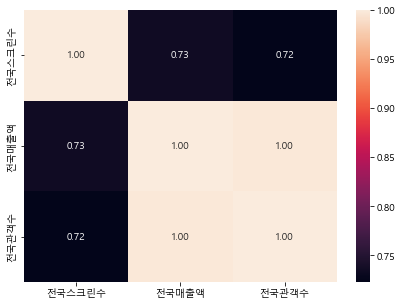

In [296]:
plt.figure(figsize=(7, 5))
sns.heatmap(data=movie_70[['전국스크린수', '전국매출액', '전국관객수']].corr(), fmt='.2f', annot=True)
plt.show()

In [297]:
movie_70.drop('전국매출액', axis=1, inplace=True) 

In [298]:
# 임시 저장
# movie_70.to_excel('../data/전체영화데이터_3_70.xls', encoding='utf-8')

#### 범주형 데이터 정리 1

- 범주형 데이터 중 `감독`, `배급사`는 각 유형의 수가 많아 더미 변수를 만들기 어렵다 판단하였습니다.
- 감독, 배급사의 영화 흥행 실적 여부를 변수로 새로 만들어 준다.
  - 흥행 실적 여부는 관객수 기준 top 400(전체 데이터의 약 10%) 여부로 설정합니다.

In [299]:
# 전체 데이터 수, 감독수, 배급사 수
len(movie_70), len(movie_70['감독'].unique()), len(movie_70['배급사'].unique())

(4051, 2682, 274)

In [300]:
# 감독, 배급사의 흥행 여부 초기값 설정
movie_70_new = movie_70.copy()
movie_70_new['감독_흥행'] = [0 for _ in range(len(movie_70))]
movie_70_new['배급사_흥행'] = [0 for _ in range(len(movie_70))]
movie_70_new.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국관객수,장르,등급,영화구분,감독_흥행,배급사_흥행
순번,,,,,,,,,,,,,
1,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,17613682,사극,15세관람가,일반영화,0,0
2,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,16264944,코미디,15세관람가,일반영화,0,0
3,신과함께-죄와 벌,김용화,롯데,2017-12-20,장편,한국,1912,14410754,판타지,12세관람가,일반영화,0,0
4,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,14245998,드라마,12세관람가,일반영화,0,0
5,어벤져스: 엔드게임,안소니 루소,디즈니,2019-04-24,장편,미국,2835,13934592,액션,12세관람가,일반영화,0,0


In [301]:
# 흥행 감독, 배급사 추출
directors = list(movie_70_new.sort_values(by='전국관객수', ascending=False)['감독'][:400].unique())
distributors = list(movie_70_new.sort_values(by='전국관객수', ascending=False)['배급사'][:400].unique())

len(directors), len(distributors)

(278, 30)

- 흥행 여부 표시

In [302]:
# 감독 흥행 표시
for director in directors:
    index = movie_70_new[movie_70_new['감독'] == director].index
    movie_70_new['감독_흥행'][index] = [1] * len(index)
# 배급사 흥행 표시
for distributor in distributors:
    index = movie_70_new[movie_70_new['배급사'] == distributor].index
    movie_70_new['배급사_흥행'][index] = [1] * len(index)

movie_70_new.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국관객수,장르,등급,영화구분,감독_흥행,배급사_흥행
순번,,,,,,,,,,,,,
1,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,17613682,사극,15세관람가,일반영화,1,1
2,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,16264944,코미디,15세관람가,일반영화,1,1
3,신과함께-죄와 벌,김용화,롯데,2017-12-20,장편,한국,1912,14410754,판타지,12세관람가,일반영화,1,1
4,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,14245998,드라마,12세관람가,일반영화,1,1
5,어벤져스: 엔드게임,안소니 루소,디즈니,2019-04-24,장편,미국,2835,13934592,액션,12세관람가,일반영화,1,1


- 흥행 여부 카운트 확인

In [303]:
movie_70_new['감독_흥행'].value_counts()

0    3374
1     677
Name: 감독_흥행, dtype: int64

In [304]:
movie_70_new['배급사_흥행'].value_counts()

0    2364
1    1687
Name: 배급사_흥행, dtype: int64

In [305]:
# 임시 저장
# movie_70_new.to_excel('../data/전체영화데이터_4_dd.xls', encoding='utf-8')

#### 범주형 데이터 정리 2

- 범주형 데이터 중 `영화형태`, `국적`, `장르`, `등급`, `영화구분`은 더미 변수를 만들어 대체한다.
  - sklearn의 OneHotEncoder을 이용해 더미 변수를 만들 수 있다.
  - 대체로 Pandas의 `get_dummies()`를 이용할 수 있다.
  - Pandas의 함수를 이용해 더미 변수를 만들었다.
  - 더미 변수의 생성으로 컬럼의 수는 41개로 늘어났다.

In [306]:
movie_dummies = pd.get_dummies(data=movie_70_new, columns=['영화형태','국적','장르','등급','영화구분'])
movie_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4051 entries, 1 to 4051
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   영화명           4051 non-null   object        
 1   감독            4051 non-null   object        
 2   배급사           4051 non-null   object        
 3   개봉일           4051 non-null   datetime64[ns]
 4   전국스크린수        4051 non-null   int64         
 5   전국관객수         4051 non-null   int64         
 6   감독_흥행         4051 non-null   int64         
 7   배급사_흥행        4051 non-null   int64         
 8   영화형태_단편       4051 non-null   uint8         
 9   영화형태_옴니버스     4051 non-null   uint8         
 10  영화형태_장편       4051 non-null   uint8         
 11  국적_기타         4051 non-null   uint8         
 12  국적_미국         4051 non-null   uint8         
 13  국적_일본         4051 non-null   uint8         
 14  국적_한국         4051 non-null   uint8         
 15  장르_SF         4051 non-null   uint8   

In [307]:
# 임시 저장
# movie_dummies.to_excel('../data/전체영화데이터_5_dummy.xls', encoding='utf-8')

## ◾모델 수립 및 예측

In [343]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### 1. 데이터 분리

#### 2020년 데이터 분리

- 먼저 코로나 이전의 데이터로 학습시키기 위해 2020년 데이터를 분리한다.
  - 총 356개의 데이터를 분리하였다.

In [311]:
movie_2020 = movie_dummies.query('개봉일 >= "20200101"')
movie_2020.head(3)

,영화명,감독,배급사,개봉일,전국스크린수,전국관객수,감독_흥행,배급사_흥행,영화형태_단편,영화형태_옴니버스,...,장르_어드벤처,장르_전쟁,장르_코미디,장르_판타지,등급_12세관람가,등급_15세관람가,등급_전체관람가,등급_청소년관람불가,영화구분_독립/예술영화,영화구분_일반영화
순번,,,,,,,,,,,,,,,,,,,,,
96,남산의 부장들,우민호,(주)쇼박스,2020-01-22,1659,4750104,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
110,다만 악에서 구하소서,홍원찬,(주)씨제이이엔엠,2020-08-05,1998,4352669,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
128,반도,연상호,(주)넥스트엔터테인먼트월드(NEW),2020-07-15,2575,3812080,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [312]:
# 임시 저장
# movie_2020.to_excel('../data/2020영화데이터_final.xls', encoding='utf-8')

#### 2011년~2019년 변수와 라벨 분리

- 더미가 있는 테이블에서 2011~2019년의 데이터를 추출한다.

In [313]:
movie_2011_2019 = movie_dummies.query('개봉일 < "2020-01-01"')
movie_2011_2019.head(3)

,영화명,감독,배급사,개봉일,전국스크린수,전국관객수,감독_흥행,배급사_흥행,영화형태_단편,영화형태_옴니버스,...,장르_어드벤처,장르_전쟁,장르_코미디,장르_판타지,등급_12세관람가,등급_15세관람가,등급_전체관람가,등급_청소년관람불가,영화구분_독립/예술영화,영화구분_일반영화
순번,,,,,,,,,,,,,,,,,,,,,
1,명량,김한민,(주)씨제이이엔엠,2014-07-30,1587,17613682,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,1978,16264944,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,신과함께-죄와 벌,김용화,롯데,2017-12-20,1912,14410754,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1


In [368]:
# 임시저장
# movie_2011_2019.to_excel('../data/2011_2019영화데이터_final.xls', encoding='utf-8')

- X : ['영화명', '감독', '배급사', '개봉일', '전국관객수'] 제외 컬럼
- y : ['전국관객수'] 컬럼
  - 값이 크기 때문에 '전국관객수 / 1000'을 사용한다.

In [332]:
not_used = ['영화명', '감독', '배급사', '개봉일', '전국관객수']
X = movie_2011_2019.drop(not_used, axis=1)
y = movie_2011_2019['전국관객수'] / 1000

X.shape, y.shape

((3695, 36), (3695,))

#### 훈련용, 테스트용 데이터 분리

- sklearn의 `train_test_split`을 사용하여 분리한다.
  - 전체 데이터의 20%를 테스트용으로 사용한다.
  - train : 2956개
  - test : 739개

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [334]:
X_train.shape, y_train.shape

((2956, 36), (2956,))

In [335]:
X_test.shape, y_test.shape

((739, 36), (739,))

### 2. 모델 수립 및 예측

#### 선형 회귀 모델

- 선형 회귀 모델 학습

In [336]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

LinearRegression()

- 예측 및 모델 평가
  - 모델 평가는 RMSE(Root Mean Square Error)을 사용한다.

In [337]:
pred_tr = lr_clf.predict(X_train)
pred_test = lr_clf.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : {}'.format(rmse_tr))
print('RMSE of Test Data : {}'.format(rmse_test))

RMSE of Train Data : 928.1568646599026
RMSE of Test Data : 885.8223485299833


- 성능 평가(참값, 예측값 비교)

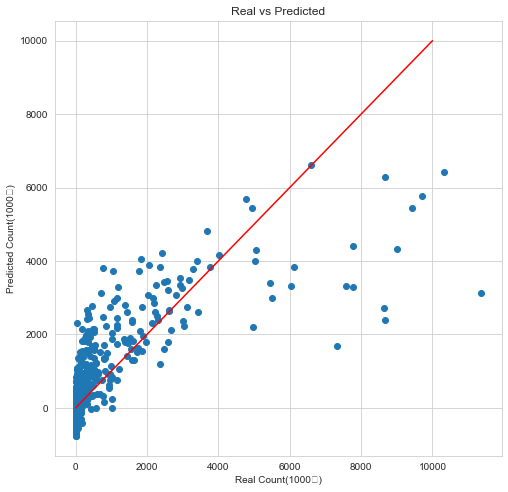

In [342]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred_test)
plt.xlabel('Real Count(1000명)')
plt.ylabel('Predicted Count(1000명)')
plt.title('Real vs Predicted')
plt.plot([0, 10000], [0, 10000], 'r')
plt.show()

#### 랜덤포레스트 회귀 모델

- GridSearch를 이용해 최고의 모델을 뽑아 비교한다.

In [344]:
params = {
    'max_depth' : [6, 8, 10],           # depth 설정
    'n_estimators' : [50, 100, 200],    # tree의 개수
    'min_samples_leaf' : [8, 12],       # 각 결과 데이터의 최소 개수
    'min_samples_split' : [8, 12]       # 분할의 최소 개수
}
# n_jobs : cpu 코어의 개수
rfr_clf = RandomForestRegressor(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rfr_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [345]:
# 결과 정리
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [346]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values(by='rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
1,1,0.631506,100,6
4,1,0.631506,100,6
16,3,0.631264,100,8
13,3,0.631264,100,8
2,5,0.631235,200,6


In [349]:
grid_cv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

- GridSearch로 알아낸 최고의 모델로 예측을 시도한다.
- **LinearRegression의 결과보다 좋은 결과를 획득하였다.**

In [348]:
best_rfr_clf = grid_cv.best_estimator_

pred_tr = best_rfr_clf.predict(X_train)
pred_test = best_rfr_clf.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : {}'.format(rmse_tr))
print('RMSE of Test Data : {}'.format(rmse_test))

RMSE of Train Data : 773.3568140400358
RMSE of Test Data : 794.3812569358838


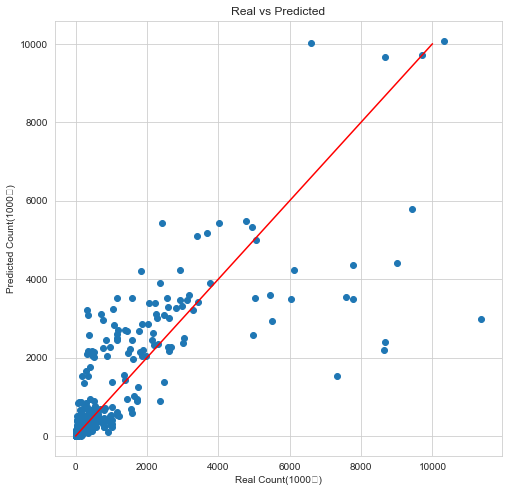

In [350]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred_test)
plt.xlabel('Real Count(1000명)')
plt.ylabel('Predicted Count(1000명)')
plt.title('Real vs Predicted')
plt.plot([0, 10000], [0, 10000], 'r')
plt.show()

### 3. 2020년 데이터 적용

#### 2020년 데이터 예측

- 2개의 모델을 비교했을 때 랜덤 포레스트 회귀 모델이 높은 성능을 냈다.
- 높은 성능을 낸 `best_rfr_clf`를 이용해 2020년 데이터를 예측한다.

In [352]:
# 변수, 라벨 분리
not_used = ['영화명', '감독', '배급사', '개봉일', '전국관객수']
X_2020 = movie_2020.drop(not_used, axis=1)
y_2020 = movie_2020['전국관객수'] / 1000

X_2020.shape, y_2020.shape

((356, 36), (356,))

- 모델 예측 및 평가
  - RMSE는 1235로 2011년~2019년 테스트 데이터의 794 보다 높은 수치를 보인다.
  - 그래프를 통해 보면 차이는 더욱 명확히 보인다.
  - **차이에 해당하는 만큼이 코로나19 영향이라 볼 수 있다.**

In [353]:
pred_2020 = best_rfr_clf.predict(X_2020)
rmse_2020 = (np.sqrt(mean_squared_error(y_2020, pred_2020)))

print('RMSE of 2020 Data : {}'.format(rmse_2020))

RMSE of 2020 Data : 1235.698240525406


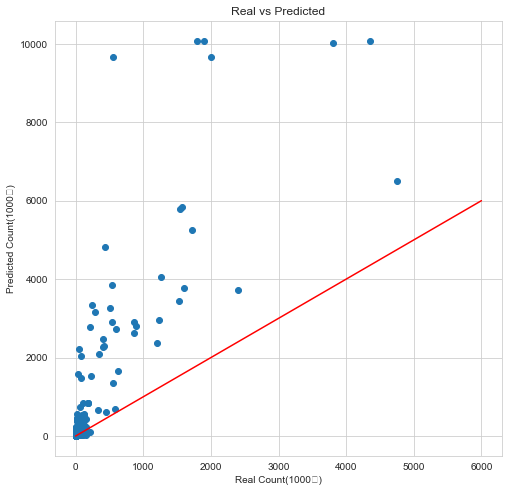

In [356]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 8))
plt.scatter(y_2020, pred_2020)
plt.xlabel('Real Count(1000명)')
plt.ylabel('Predicted Count(1000명)')
plt.title('Real vs Predicted')
plt.plot([0, 6000], [0, 6000], 'r')
plt.show()

#### 실제값과 예측값 비교

- 예측 결과를 `movie_2020`에 추가하여 비교해본다.

In [361]:
not_used = ['영화명', '감독', '배급사', '개봉일', '전국관객수']
movie_predict = movie_2020[not_used]
# 1000으로 나눈 예측값이므로 다시 곱해준다.
movie_predict['예측관객수'] = (pred_2020 * 1000).astype('int')

In [362]:
movie_predict.head()

,영화명,감독,배급사,개봉일,전국관객수,예측관객수
순번,,,,,,
96,남산의 부장들,우민호,(주)쇼박스,2020-01-22,4750104,6510702
110,다만 악에서 구하소서,홍원찬,(주)씨제이이엔엠,2020-08-05,4352669,10078537
128,반도,연상호,(주)넥스트엔터테인먼트월드(NEW),2020-07-15,3812080,10030009
229,히트맨,최원섭,롯데,2020-01-22,2406232,3732208
273,테넷,크리스토퍼 놀란,워너브러더스 코리아(주),2020-08-26,1998987,9656419


- 전국 관객수와 예측 관객수 히스토그램
  - 관객수가 적은 것이 많다보니 확인하기 어렵지만 기존 관객수는 최대가 480만명 정도이다.
  - 그에 반해 예측 관객수는 1000만명을 넘어서는 영화만 4개로 관측되었다.

In [366]:
fig = px.histogram(movie_predict, x='전국관객수')
fig.show()

In [367]:
fig = px.histogram(movie_predict, x='예측관객수')
fig.show()

- 2019년 영화 히스토그램

In [369]:
movie_2019 = movie_2011_2019[not_used].query('개봉일 >= "2019-01-01"')
fig = px.histogram(movie_2019, x='전국관객수')
fig.show()

#### 결과

- 2020년 영화의 최대 관객수는 480만 명으로 400만 명을 넘는 영화도 적다.
- 2011년~2019년 데이터를 이용한 예측 모델로 예측한 결과 1000만 명이 넘는 영화가 4개 900만 명인 영화가 2개로 상당히 높은 수치를 기록했다.
- 2020년 예측치와 2019년 전국관객수 히스토그램을 비교해보면 차이가 나긴 하지만 코로나19의 영향을 확인해볼 수 있었다.